## Exploring and Preparing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Paul Urias\Visual Studio Code\Data Cience\ADS Capston\dataset_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

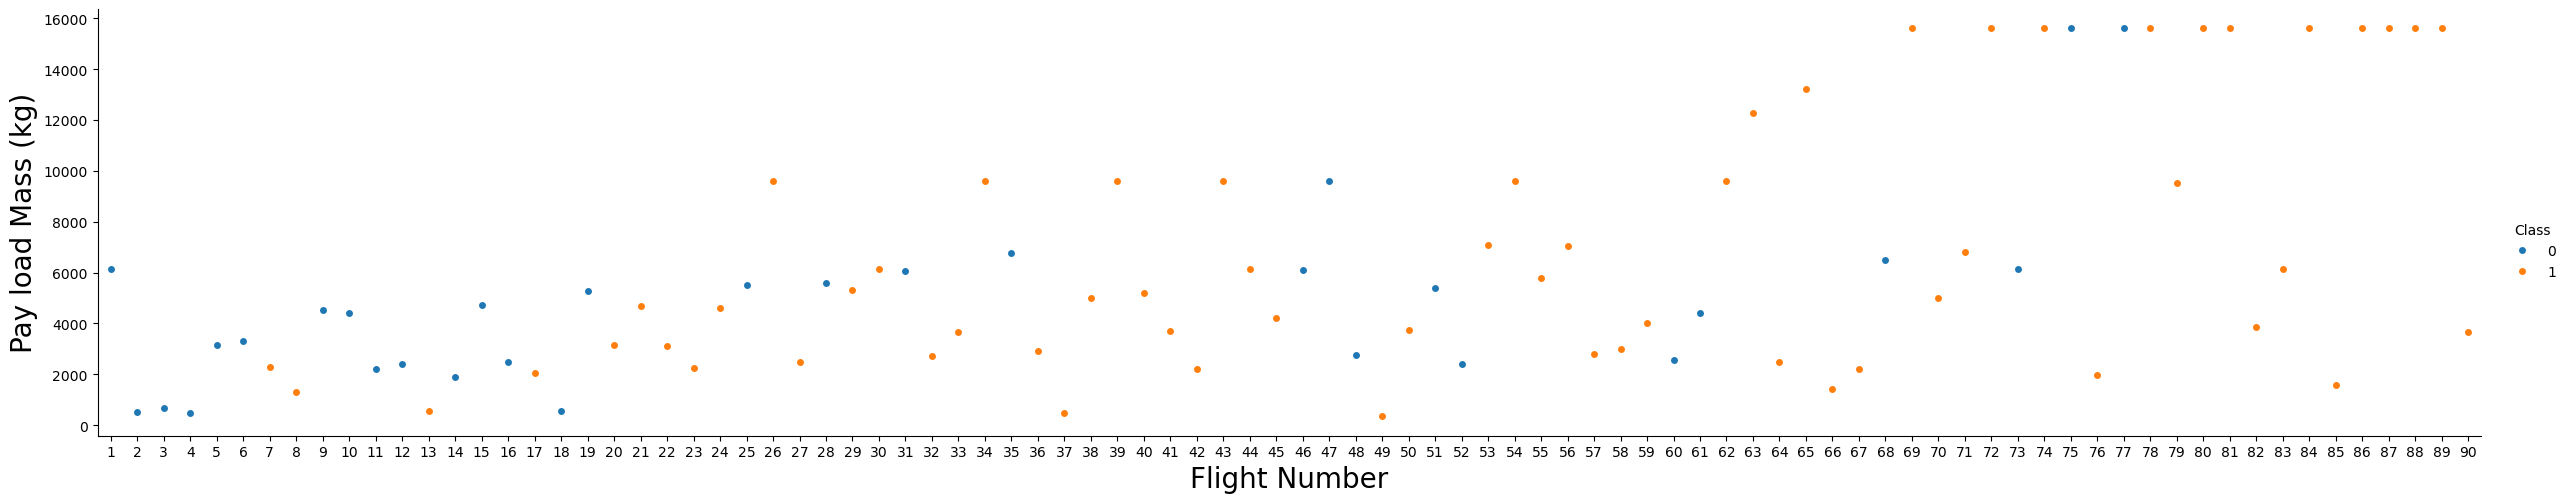

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

## TASK 1: Visualize the relationship between Flight Number and Launch Site

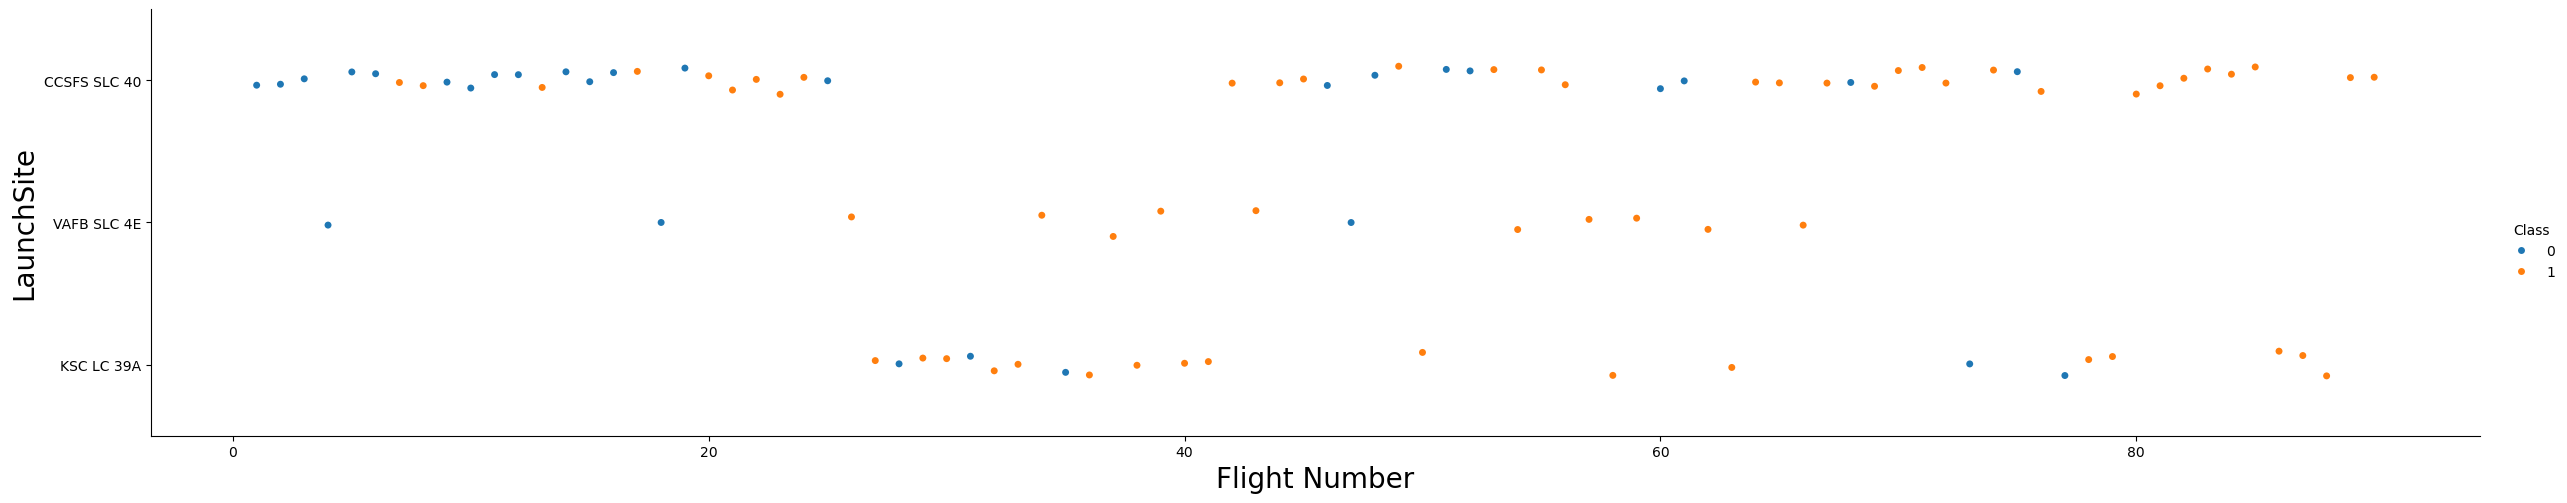

In [4]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5) 
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

## TASK 2: Visualize the relationship between Payload Mass and Launch Site

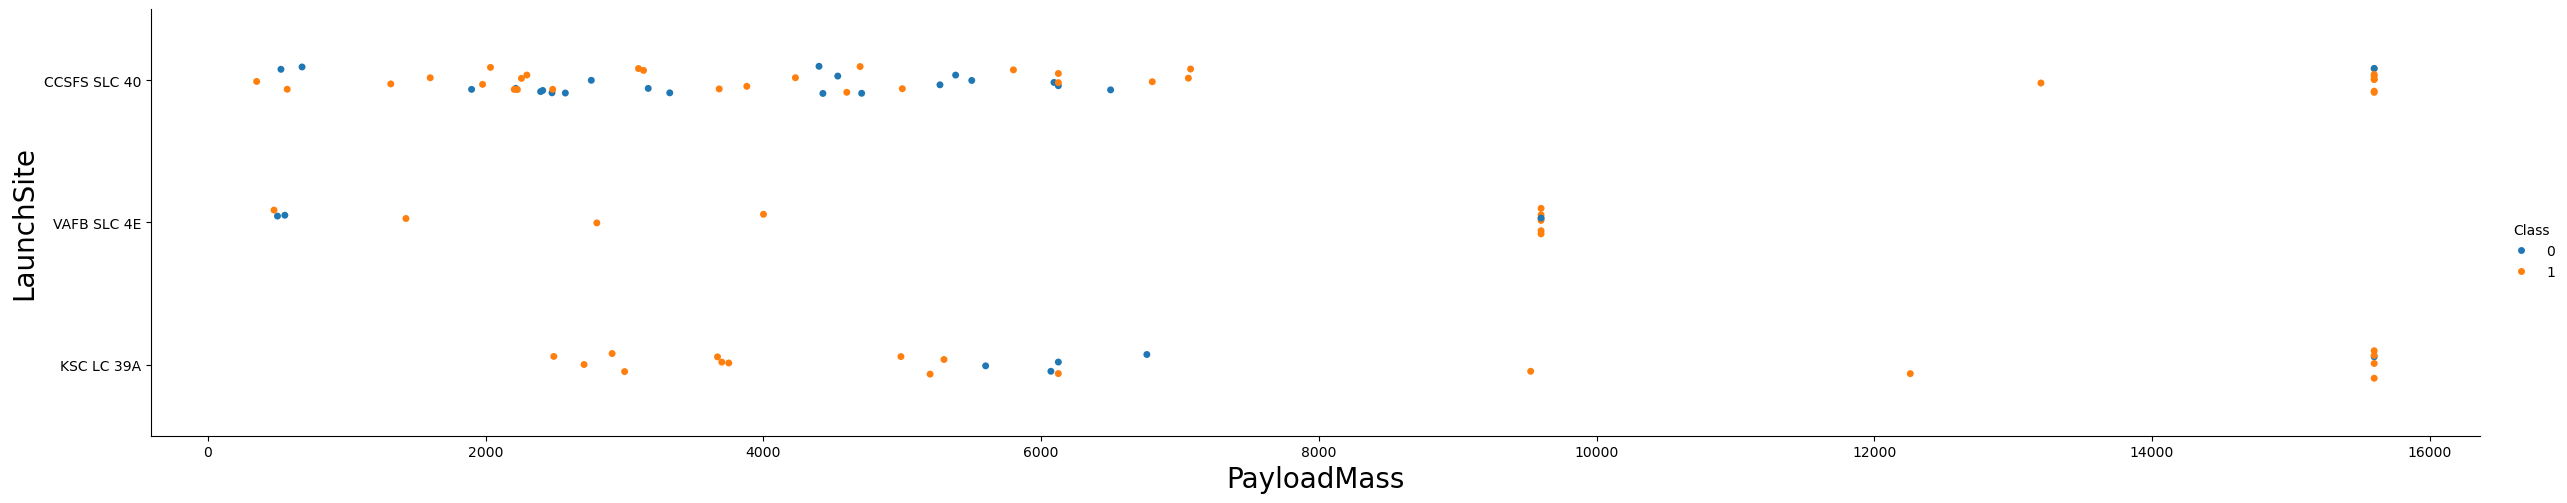

In [5]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

## TASK 3: Visualize the relationship between success rate of each orbit type

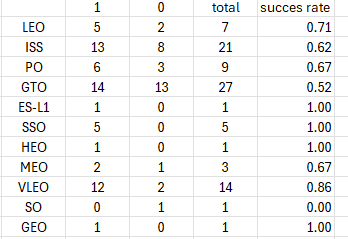

normalmente la operacion seria contar los unos(succes)(5) y dividir entre el total de launches(class outcome)(7)=0.71 para LEO\
Como Success is labled as 1, al sacar la media entre 1s y 0s nos da el resultado. 
* si succes estuviera labeled as 0, (failure as 1) al sacar la media nos daria el failure rate. (restarle a 1 el failure rate nos daria el success rate)

In [6]:
succes_rate_by_launchsite = df.groupby('Orbit')['Class'].mean() #usar reset index si se queire pasar a dataframe
succes_rate_by_launchsite

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

In [7]:
succes_rate_by_launchsite.values

array([1.        , 1.        , 0.51851852, 1.        , 0.61904762,
       0.71428571, 0.66666667, 0.66666667, 0.        , 1.        ,
       0.85714286])

Text(0, 0.5, 'Success Rate')

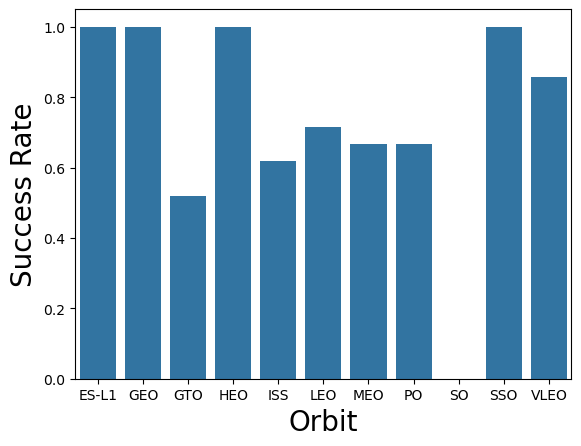

In [8]:
sns.barplot(y=succes_rate_by_launchsite.values, x=succes_rate_by_launchsite.index)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)

## TASK 4: Visualize the relationship between FlightNumber and Orbit type

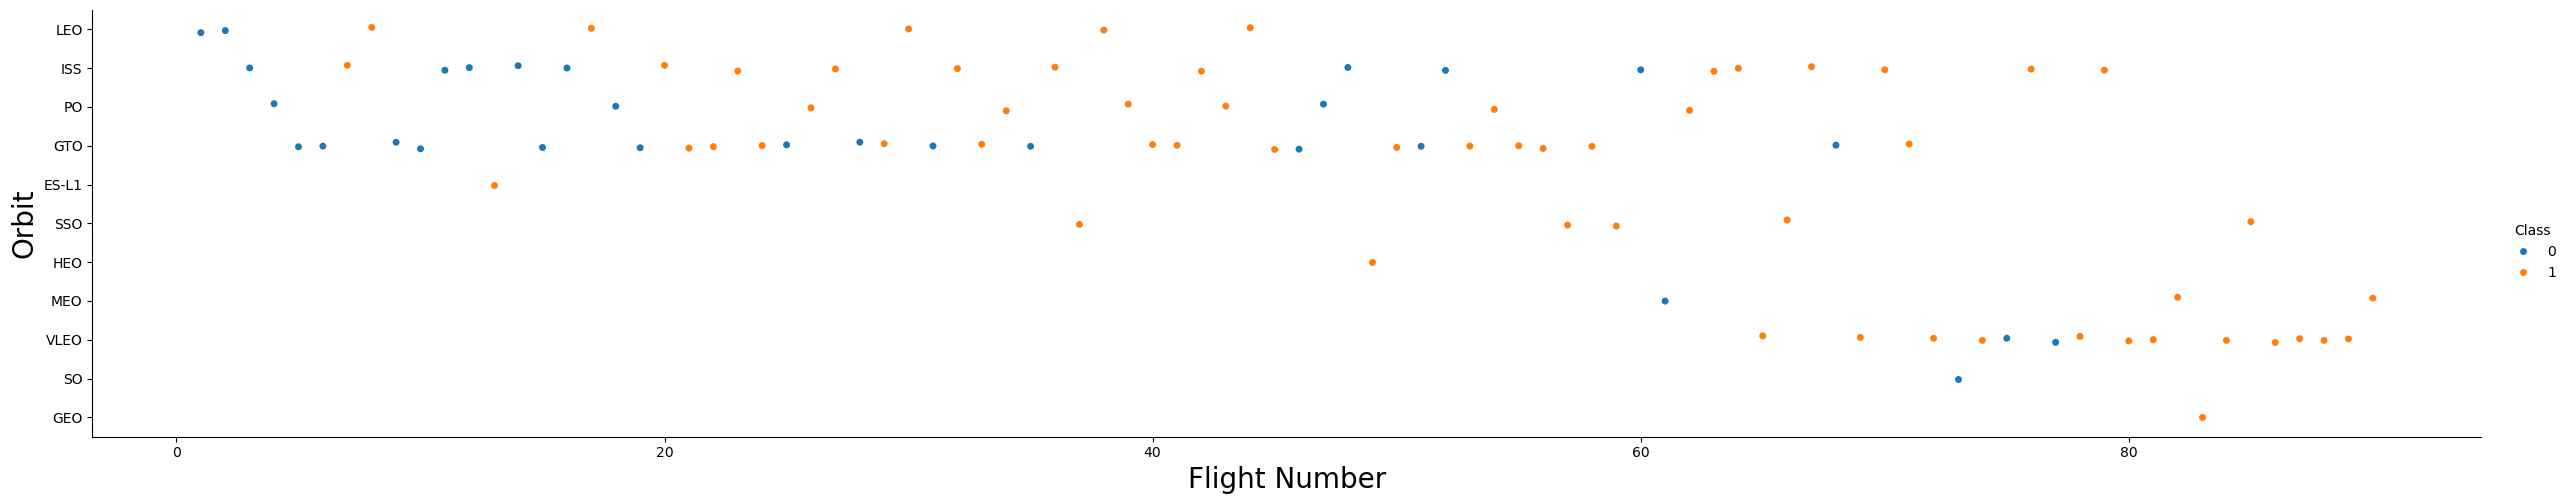

In [9]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

## TASK 5: Visualize the relationship between Payload Mass and Orbit type

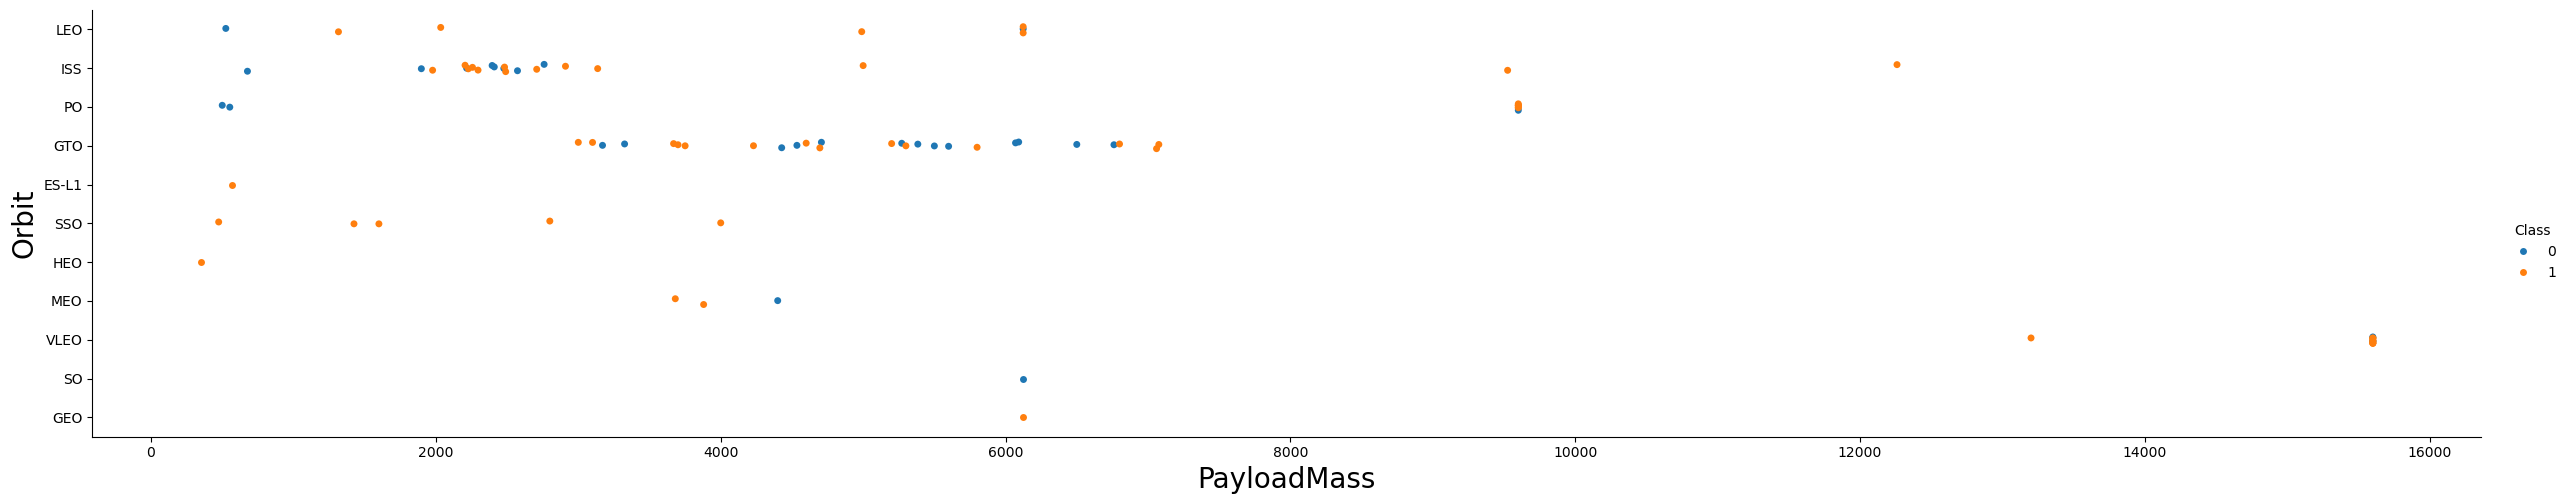

In [10]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

## TASK 6: Visualize the launch success yearly trend

#### El lab nos dio esta funcion
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

Pero es poco practica, Usaremo nuestro method (pandas)

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [12]:
succes_rate_per_year = df.groupby('Year')['Class'].mean()
succes_rate_per_year

Year
2010    0.000000
2012    0.000000
2013    0.000000
2014    0.333333
2015    0.333333
2016    0.625000
2017    0.833333
2018    0.611111
2019    0.900000
2020    0.842105
Name: Class, dtype: float64

Text(0, 0.5, 'Success Rate')

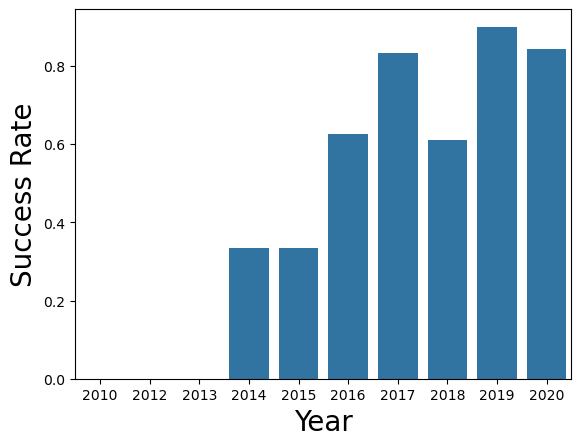

In [13]:
sns.barplot(y=succes_rate_per_year.values, x=succes_rate_per_year.index)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)

## Features Engineering

In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


## TASK 7: Create dummy variables to categorical columns

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [15]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15600.000000,2,True,True,True,5.0,12,False,False,...,False,False,False,False,False,False,False,False,True,False
86,87,15600.000000,3,True,True,True,5.0,13,False,False,...,False,False,False,False,False,False,True,False,False,False
87,88,15600.000000,6,True,True,True,5.0,12,False,False,...,False,False,False,True,False,False,False,False,False,False
88,89,15600.000000,3,True,True,True,5.0,12,False,False,...,False,False,False,False,False,False,False,False,True,False


## TASK 8: Cast all numeric columns to float64

In [16]:
features_one_hot = features_one_hot.astype('float64')

In [17]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_ES-L1                          90 non-null     float64
 9   Orbit_GEO                            90 non-null     float64
 10  Orbit_GTO                            90 non-null     float64
 11  Orbit_HEO                         

In [18]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)